In [1]:
%cd ..

/home/maximilian/Github/melp


In [2]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.colors import LogNorm
import seaborn as sns

Welcome to JupyROOT 6.24/06


In [3]:
def readROOTFile(filename: str, station: int):
    global cluster_dist_tmp
    
    file = ROOT.TFile(filename)
    ttree_mu3e = file.Get("mu3e")
    ttree_mu3e_mc = file.Get("mu3e_mchits")
    
    for frame in range(ttree_mu3e.GetEntries()):
        ttree_mu3e.GetEntry(frame)
        #tilehits = ttree_mu3e.tilehit_tile
        #tilehits_primaries = ttree_mu3e.tilehit_primary

        indices = np.argsort(list(ttree_mu3e.tilehit_primary))
        tilehit_ids = np.asarray(list(ttree_mu3e.tilehit_tile))[indices]
        tilehit_primaries = np.asarray(list(ttree_mu3e.tilehit_primary))[indices]
        tilehit_mc_i = np.asarray(list(ttree_mu3e.tilehit_mc_i))[indices]

        tilehit_hid = []
        for i in range(len(tilehit_mc_i)):
            mc_i = tilehit_mc_i[i]
            ttree_mu3e_mc.GetEntry(mc_i)
            tilehit_hid.append(ttree_mu3e_mc.hid)
        tilehit_hid = np.asarray(tilehit_hid)








        if len(tilehit_primaries) == 0:
            continue

        single_events = {}

        tmp_primary_reference = tilehit_primaries[0]
        index_start_track = 0
        for index in range(len(tilehit_ids)):
            if tilehit_primaries[index] != tmp_primary_reference:
                single_events[index] = [tilehit_ids[index_start_track:index], tilehit_hid[index_start_track:index]]
                index_start_track = index
                tmp_primary_reference = tilehit_primaries[index]

        # fill up remaining event
        if index_start_track != len(tilehit_ids):
            single_events[len(tilehit_ids)] = [tilehit_ids[index_start_track:], tilehit_hid[index_start_track:]]

        # delete mismatched keys and hits without clusters
        keys_to_delete = []
        for key in single_events:
            if len(single_events[key][0]) == 1:
                keys_to_delete.append(key)
            elif any(single_events[key][0] < 300000) and station == 300000:
                keys_to_delete.append(key)
            elif any(single_events[key][0] >= 300000) and station == 200000:
                keys_to_delete.append(key)


        for key in keys_to_delete:
            del single_events[key]

        for entry in single_events:
            indices = np.argsort(single_events[entry][1])
            single_events[entry][0] = single_events[entry][0][indices]
            #single_events[entry][1] = single_events[entry][1][indices]


            single_events[entry][0] -= single_events[entry][0][0]
            
            #do not include clusters in statistics if we cant display them and they are unrealistic
            single_events[entry][0] = [x for x in single_events[entry][0] if abs(x) < 172]
            if len(single_events[entry][0]) > 1:
                cluster_dist_tmp += list(single_events[entry][0])

In [4]:
filenames = ["run42_20000.root", "mu3e_run_000133_sorted_truth.root", "mu3e_run_000134_sorted_truth.root", "mu3e_run_000135_sorted_truth.root"]
cluster_dist_tmp = []

for filename in filenames:
    readROOTFile(filename, station=300000)

In [5]:
# not pretty but functional

cluster_distribution_upstream = np.zeros((7,7))
for hit in cluster_dist_tmp:
    if hit == 0:
        cluster_distribution_upstream[3][3] += 1
    elif hit == 1:
        cluster_distribution_upstream[2][3] += 1
    elif hit == 2:
        cluster_distribution_upstream[1][3] += 1
    elif hit == 3:
        cluster_distribution_upstream[0][3] += 1
    elif hit == -1:
        cluster_distribution_upstream[4][3] += 1
    elif hit == -2:
        cluster_distribution_upstream[5][3] += 1
    elif hit == -3:
        cluster_distribution_upstream[6][3] += 1

        
    elif hit == 56:
        cluster_distribution_upstream[3][4] += 1
    elif hit == 57:
        cluster_distribution_upstream[2][4] += 1
    elif hit == 58:
        cluster_distribution_upstream[1][4] += 1
    elif hit == 59:
        cluster_distribution_upstream[0][4] += 1
    elif hit == 55:
        cluster_distribution_upstream[4][4] += 1
    elif hit == 54:
        cluster_distribution_upstream[5][4] += 1
    elif hit == 53:
        cluster_distribution_upstream[6][4] += 1
        
    elif hit == 56+56:
        cluster_distribution_upstream[3][5] += 1
    elif hit == 57+56:
        cluster_distribution_upstream[2][5] += 1
    elif hit == 58+56:
        cluster_distribution_upstream[1][5] += 1
    elif hit == 59+56:
        cluster_distribution_upstream[0][5] += 1
    elif hit == 55+56:
        cluster_distribution_upstream[4][5] += 1
    elif hit == 54+56:
        cluster_distribution_upstream[5][5] += 1
    elif hit == 53+56:
        cluster_distribution_upstream[6][5] += 1

    elif hit == 56+2*56:
        cluster_distribution_upstream[3][6] += 1
    elif hit == 57+2*56:
        cluster_distribution_upstream[2][6] += 1
    elif hit == 58+2*56:
        cluster_distribution_upstream[1][6] += 1
    elif hit == 59+2*56:
        cluster_distribution_upstream[0][6] += 1
    elif hit == 55+2*56:
        cluster_distribution_upstream[4][6] += 1
    elif hit == 54+2*56:
        cluster_distribution_upstream[5][6] += 1
    elif hit == 53+2*56:
        cluster_distribution_upstream[6][6] += 1
        
    if hit == 0-56:
        cluster_distribution_upstream[3][2] += 1
    elif hit == 1-56:
        cluster_distribution_upstream[2][2] += 1
    elif hit == 2-56:
        cluster_distribution_upstream[1][2] += 1
    elif hit == 3-56:
        cluster_distribution_upstream[0][2] += 1
    elif hit == -1-56:
        cluster_distribution_upstream[4][2] += 1
    elif hit == -2-56:
        cluster_distribution_upstream[5][2] += 1
    elif hit == -3-56:
        cluster_distribution_upstream[6][2] += 1
        
    if hit == 0-2*56:
        cluster_distribution_upstream[3][1] += 1
    elif hit == 1-2*56:
        cluster_distribution_upstream[2][1] += 1
    elif hit == 2-2*56:
        cluster_distribution_upstream[1][1] += 1
    elif hit == 3-2*56:
        cluster_distribution_upstream[0][1] += 1
    elif hit == -1-2*56:
        cluster_distribution_upstream[4][1] += 1
    elif hit == -2-2*56:
        cluster_distribution_upstream[5][1] += 1
    elif hit == -3-2*56:
        cluster_distribution_upstream[6][1] += 1
        
    if hit == 0-3*56:
        cluster_distribution_upstream[3][0] += 1
    elif hit == 1-3*56:
        cluster_distribution_upstream[2][0] += 1
    elif hit == 2-3*56:
        cluster_distribution_upstream[1][0] += 1
    elif hit == 3-3*56:
        cluster_distribution_upstream[0][0] += 1
    elif hit == -1-3*56:
        cluster_distribution_upstream[4][0] += 1
    elif hit == -2-3*56:
        cluster_distribution_upstream[5][0] += 1
    elif hit == -3-3*56:
        cluster_distribution_upstream[6][0] += 1

In [6]:
cluster_distribution_upstream /= cluster_distribution_upstream[3][3]

In [7]:
mask = np.zeros((7,7))

for x in range(7):
    for y in range(7):
        if cluster_distribution_upstream[x][y] < 0.01:
            mask[x][y] = True

In [8]:
mask

array([[1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 0., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.]])

In [9]:
#cluster_distribution_upstream = np.delete(cluster_distribution_upstream, 0, 0)
#mask = np.delete(mask, 0, 0)

#cluster_distribution_upstream = np.delete(cluster_distribution_upstream, -1, 0)
#mask = np.delete(mask, -1, 0)

#cluster_distribution_upstream = np.delete(cluster_distribution_upstream, -1, 1)
#mask = np.delete(mask, -1, 1)

In [10]:
cluster_distribution_upstream = np.delete(cluster_distribution_upstream, 0, 0)
mask = np.delete(mask, 0, 0)

cluster_distribution_upstream = np.delete(cluster_distribution_upstream, -1, 0)
mask = np.delete(mask, -1, 0)

cluster_distribution_upstream = np.delete(cluster_distribution_upstream, 0, 1)
mask = np.delete(mask, 0, 1)

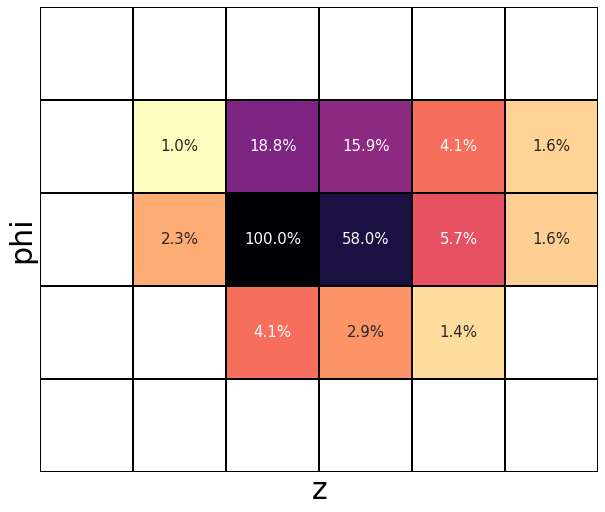

In [19]:
plt.rcParams.update({'font.size': 30})


fig = plt.figure(figsize=(10, 10))

ax = sns.heatmap(cluster_distribution_upstream, 
                 cmap="magma_r", 
                 cbar=False, 
                 norm=LogNorm(), 
                 annot=True, 
                 annot_kws={'fontsize': 15}, 
                 fmt='.1%',
                 square=True,
                 xticklabels=False,
                 yticklabels=False,
                 mask=mask,
                 linewidths=2,
                 linecolor="black")
plt.xlabel("z")
plt.ylabel("phi")
plt.show()

In [12]:
print(np.around(cluster_distribution_upstream,3))

[[0.001 0.003 0.007 0.01  0.009 0.007]
 [0.002 0.01  0.188 0.159 0.041 0.016]
 [0.002 0.023 1.    0.58  0.057 0.016]
 [0.002 0.007 0.041 0.029 0.014 0.009]
 [0.002 0.003 0.006 0.007 0.007 0.006]]
